In [1]:
import streamlit as st
from PIL import Image
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
def get_top_coins_by_volume(limit=20, days=5):
    # CoinGecko API endpoint for coins/markets
    api_endpoint = "https://api.coingecko.com/api/v3/coins/markets"
    historical_data_endpoint = "https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"

    # Parameters for the API request
    params = {
        'vs_currency': 'usd',
        'order': 'volume_desc',  # Sort by volume in descending order
        'per_page': limit,
        'page': 1,  # Adjust the page number if you want more than 20 coins
    }

    try:
        # Make the API request
        response = requests.get(api_endpoint, params=params)
        if response.status_code == 200:
            print("STATUS 200 == [Response Sucessful]")
        else:
            print("STATUS ERROR == [Response Failed]")
        data = response.json()


        coin_info = []
        for coin_data in data:
            coin_id = coin_data['id']
            coin_name = coin_data['name']
            coin_symbol = coin_data['symbol']

            # Get historical price data
            historical_params = {
                'vs_currency': 'usd',
                'days': days,
            }
            historical_response = requests.get(historical_data_endpoint.format(coin_id=coin_id), params=historical_params)
            historical_data = historical_response.json()
            
            # Check if 'prices' key exists in the response
            if 'prices' in historical_data:
                prices = historical_data['prices']
                coin_info.append({
                    'Name': coin_name,
                    'Symbol': coin_symbol,
                    'Prices': prices
                })

        df = pd.DataFrame(coin_info)
        return df

    except Exception as e:
        print(f'Error: {e}')

# Rest of your code remains the same...


In [3]:
data = get_top_coins_by_volume()


STATUS 200 == [Response Sucessful]
aave-eth-v1
Aave ETH v1
aeth
tether
Tether
usdt
ethereum
Ethereum
eth
bitcoin
Bitcoin
btc
usd-coin
USDC
usdc
binance-usd
BUSD
busd
aave-usdc-v1
Aave USDC v1
ausdc
terrausd
TerraClassicUSD
ustc
aave-link-v1
Aave LINK v1
alink
solana
Solana
sol
gala
GALA
gala
weth
WETH
weth
ripple
XRP
xrp
dogecoin
Dogecoin
doge
binancecoin
BNB
bnb
aave-tusd-v1
Aave TUSD v1
atusd
chainlink
Chainlink
link
immutable-x
Immutable
imx
terra-luna
Terra Luna Classic
lunc
thorchain
THORChain
rune


In [11]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
api_key = 'cfc334e3-6b99-4891-8d48-aec7f23253f9'
url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': f'{api_key}',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2023-11-28T15:34:09.664Z', 'error_code': 0, 'error_message': None, 'elapsed': 1, 'credit_count': 1, 'notice': None}, 'data': [{'id': 6476, 'name': 'phk6wghmlrq', 'symbol': 'orm27z266ui', 'slug': '8gaz207ympc', 'cmc_rank': 532, 'num_market_pairs': 124, 'circulating_supply': 5296, 'total_supply': 9166, 'max_supply': 6667, 'infinite_supply': None, 'last_updated': '2023-11-28T15:34:09.663Z', 'date_added': '2023-11-28T15:34:09.663Z', 'tags': ['jz2puquyjd', 'ayjt7h47ess', '2j3yqq6jzgo', 'l0im6h8mt7g', 'kqvuylj2gfa', 'smsoaze8an', 'ypfz30ukdl', 'ee5nocaqpie', 'ipl7tkrr4kd', '3wd0rjnatw3'], 'platform': None, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'quote': {'USD': {'price': 0.1265154773515602, 'volume_24h': 2006, 'volume_change_24h': 0.10600924868585726, 'percent_change_1h': 0.6051320669290685, 'percent_change_24h': 0.6735372755905751, 'percent_change_7d': 0.7487972421589095, 'market_cap': 0.2680722608585331, 'market_cap_dominance':

In [4]:
df = data

for row in df.iterrows():
    row[1]['Prices'] = [x[1] for x in row[1]["Prices"]]
    x = row[1]['Prices']
    


In [5]:

for row in df.iterrows():
    x = row[1]["Prices"]
    print(len(x))

121
121
121
121
121
121
121
121
121


In [34]:
def get_comminuty_trending_tokens():
    api_key = 'cfc334e3-6b99-4891-8d48-aec7f23253f9'
    cmc_url = 'https://sandbox-api.coinmarketcap.com/'
    url_suffix = 'v1/community/trending/token'
    url = cmc_url + url_suffix

    parameters = {
        'limit':'5',
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': f'{api_key}',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
        return data
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)


In [35]:
response = get_comminuty_trending_tokens()


{'status': {'timestamp': '2023-11-28T15:56:56.980Z', 'error_code': 0, 'error_message': None, 'elapsed': 1, 'credit_count': 0, 'notice': None}, 'data': [{'id': 9462, 'name': 'h00e63lpi7a', 'symbol': '4qtftmp6g02', 'slug': '8k9oonw6z2q', 'cmc_rank': 2193, 'rank': 3510}, {'id': 6458, 'name': '2zdabrtsrdb', 'symbol': '077jod6tstfs', 'slug': '2xfz4p8uqs1', 'cmc_rank': 4298, 'rank': 5523}, {'id': 8987, 'name': '4x0k07ocsu7', 'symbol': '8o3c6tniydn', 'slug': 'irxi5bu3j8', 'cmc_rank': 2121, 'rank': 1961}, {'id': 333, 'name': '8632o8t5wlc', 'symbol': 'rcxkowaz16i', 'slug': '978jxae4kkh', 'cmc_rank': 6881, 'rank': 3665}, {'id': 6092, 'name': 'm1zb9746g7f', 'symbol': 'm6fuf8q4xrl', 'slug': 'ktzv3gmr9xg', 'cmc_rank': 2574, 'rank': 2773}, {'id': 3972, 'name': 'gi64s6ngbiu', 'symbol': 'z1263z1ai1', 'slug': 'eoe0c85xhoc', 'cmc_rank': 3388, 'rank': 8169}, {'id': 5474, 'name': 'c4xsalh5m6h', 'symbol': 'a5a5997z6lg', 'slug': 'p4umkx2dvi', 'cmc_rank': 1860, 'rank': 4005}, {'id': 6530, 'name': '3cpqf43knh

In [44]:
error_code = response['status']['error_code']
if er_code != 0:
    print("Error:" + str(response['status']['error_code']))

In [24]:
import pandas as pd
from requests import Session, ConnectionError, Timeout, TooManyRedirects
import json

def get_community_trending_tokens():
    api_key = 'cfc334e3-6b99-4891-8d48-aec7f23253f9'
    cmc_url = 'https://sandbox-api.coinmarketcap.com/'
    url_suffix = 'v1/community/trending/token'
    url = cmc_url + url_suffix

    parameters = {
        'limit': '5',
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': f'{api_key}',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)

        # Check if the response contains the expected data structure
        if 'data' in data and 'list' in data['data']:
            posts = data['data']['list']
            # Creating a DataFrame from the 'posts' list
            df = pd.DataFrame(posts)
            
            # Perform any additional cleaning or processing here if needed
            # For example, you can drop unnecessary columns or rename them

            return df
        else:
            print("Unexpected response format.")
            return None

    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return None




Unexpected response format.


{'status': {'timestamp': '2023-11-28T15:49:53.430Z', 'error_code': 0, 'error_message': None, 'elapsed': 1, 'credit_count': 0, 'notice': None}, 'data': [{'id': 7486, 'name': 'r744wz8s7ht', 'symbol': '7bunqkd8amm', 'slug': '1wa9lw6ox5p', 'cmc_rank': 2985, 'rank': 2437}, {'id': 1460, 'name': 'yuhhwi8ynqe', 'symbol': 'ywipiuvc7yi', 'slug': 'oly6ccmzvok', 'cmc_rank': 8784, 'rank': 3375}, {'id': 8363, 'name': '6bcmm6c06ca', 'symbol': 'v4h10wrrn', 'slug': '22s84364698', 'cmc_rank': 8326, 'rank': 4964}, {'id': 4018, 'name': '1kbjc8nxela', 'symbol': 'bjqi55sntgp', 'slug': '2rt6cqswizw', 'cmc_rank': 9407, 'rank': 843}, {'id': 1679, 'name': 'z2gyjlrl2a', 'symbol': 'tljj4vawvio', 'slug': '58x45saev1x', 'cmc_rank': 1441, 'rank': 3819}, {'id': 9597, 'name': 'nspsc1g7yqe', 'symbol': 'dh97bbnct2e', 'slug': 'knfjdfxhnx', 'cmc_rank': 7184, 'rank': 7350}, {'id': 8689, 'name': 'civhavt99vp', 'symbol': 'i79w8l9fsqr', 'slug': 'gl4g61v6m5', 'cmc_rank': 7716, 'rank': 2161}, {'id': 6294, 'name': '9satqelwhlm',

TypeError: 'NoneType' object is not subscriptable

In [9]:
x = df["Prices"]
symbol_pairs = list(itertools.combinations(df["Symbol"], 2))
correlations = []
for pair in symbol_pairs:
    symbol1, symbol2 = pair
    prices1 = df[df["Symbol"] == symbol1]["Prices"].iloc[0]
    length1 = len(prices1)
    prices2 = df[df["Symbol"] == symbol2]["Prices"].iloc[0]
    length2 = len(prices2)

    correlation = pd.Series(prices1).corr(pd.Series(prices2))
    correlations.append((symbol1, symbol2, correlation))

correlation_df = pd.DataFrame(correlations, columns=["Symbol1", "Symbol2", "Correlation"])
heatmap_data = correlation_df.pivot(index="Symbol1", columns="Symbol2", values="Correlation")
print(heatmap_data)


Symbol2     alink     ausdc       btc      busd       eth      usdc     usdt  \
Symbol1                                                                        
aeth     0.599946  0.151445  0.908828  0.055728  0.999078  0.056040  0.29483   
ausdc    0.029459       NaN       NaN       NaN       NaN       NaN      NaN   
btc      0.614510  0.167049       NaN  0.072002       NaN  0.055439      NaN   
busd    -0.002260  0.197402       NaN       NaN       NaN       NaN      NaN   
eth      0.600231  0.150074  0.908249  0.048232       NaN  0.059977      NaN   
usdc     0.107466  0.186207       NaN  0.269797       NaN       NaN      NaN   
usdt     0.313305  0.283098  0.423773  0.171265  0.300106  0.455037      NaN   
ustc    -0.274576       NaN       NaN       NaN       NaN       NaN      NaN   

Symbol2      ustc  
Symbol1            
aeth    -0.730641  
ausdc   -0.252455  
btc     -0.612568  
busd     0.008410  
eth     -0.730837  
usdc     0.000357  
usdt    -0.188561  
ustc          NaN  

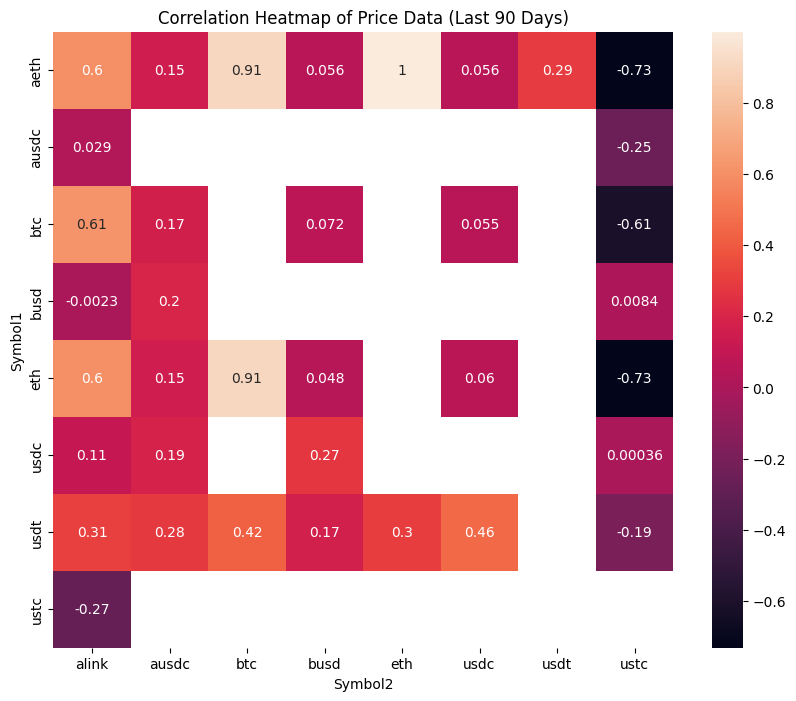

In [8]:

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True)
plt.title("Correlation Heatmap of Price Data (Last 90 Days)")
plt.show()

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yfin

In [ ]:
 # user settings (modify accordingly to Yahoo Finance parameters)
currency = "USDT"
metric = "Close"

# Date
start = dt.datetime(2018, 1, 1)
end = dt.datetime.now()

In [ ]:
# pick your favorite list of cryptocurrencies
crypto = ["BTC", "ETH", "LTC", "XRP", "DASH", "SC"]

In [ ]:
yfin.pdr_override()

colnames = []

first = True

for ticker in crypto:
    data = yfin.download(f"{ticker}-{currency}", start, end)
    if first:
        combined = data[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(data[metric])
        colnames.append(ticker)
        combined.columns = colnames

combined

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USDT: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ETH-USDT: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- LTC-USDT: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- XRP-USDT: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DASH-USDT: No timezone found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SC-USDT: No timezone found, symbol may be delisted


,BTC,ETH,LTC,XRP,DASH,SC
Date,,,,,,


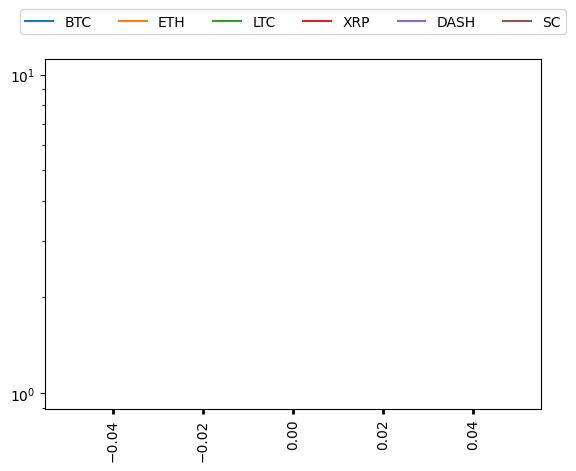

ValueError: attempt to get argmax of an empty sequence

In [ ]:
plt.yscale("log")  # first show linear
for ticker in crypto:
    plt.plot(combined[ticker], label=ticker)

plt.tick_params(axis="x", width=2)
plt.xticks(
    rotation="vertical",
)
plt.margins(0.01)
plt.subplots_adjust(bottom=0.15)
plt.legend(
    loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=6, fancybox=True, shadow=False
)
plt.show()

# Correlation Heat Map
combined = combined.pct_change().corr(method="pearson")

sns.heatmap(combined, annot=True, cmap="coolwarm")
plt.show()
print(combined)